# Data Analysis for Customer Churn Prediction

In [1]:
import pandas as pd

In [9]:
original_df = pd.read_excel("dataset/customer_churn_large_dataset.xlsx")
original_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
df = original_df
print(f"Missing Values:\n\n{df.isna().sum()}")

Missing Values:

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


No missing values in the dataset.

In [4]:
df = df.drop_duplicates()
print("Dataset size after removing duplicates:", len(df))

Dataset size after removing duplicates: 100000


No duplicate rows in the dataset

In [6]:
df = df.drop(columns=["Name", "CustomerID"], errors="ignore")
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [10]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


## Exploratory Data Analysis

In [7]:
import seaborn as sns

### Distributions of numerical features

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Age distribution')]

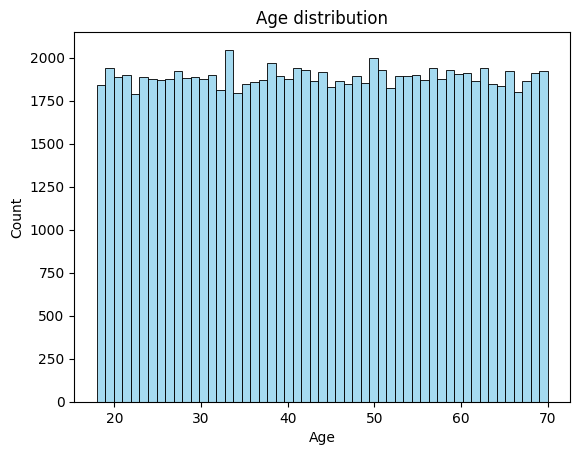

In [45]:
sns.histplot(df, x="Age", bins=df.Age.max()-df.Age.min()+1, color="skyblue").set(title="Age distribution")

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Subscription Length distribution')]

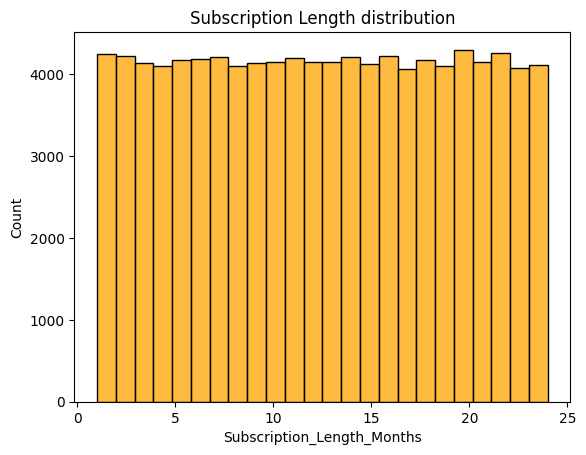

In [46]:
sns.histplot(df, x="Subscription_Length_Months", bins=24, color="orange").set(title="Subscription Length distribution")

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Monthly Bill distribution')]

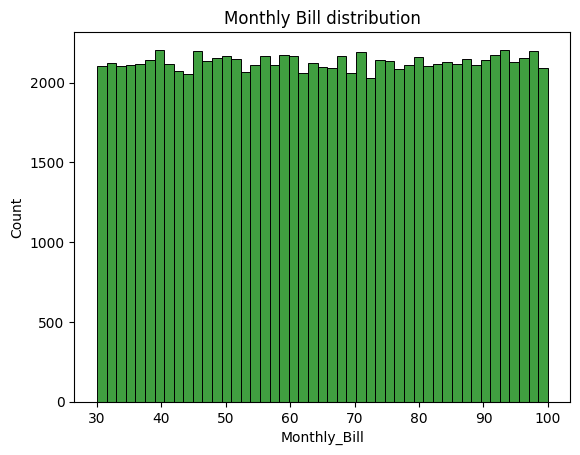

In [47]:
sns.histplot(df, x="Monthly_Bill", color="green").set(title="Monthly Bill distribution")

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Total usage distribution')]

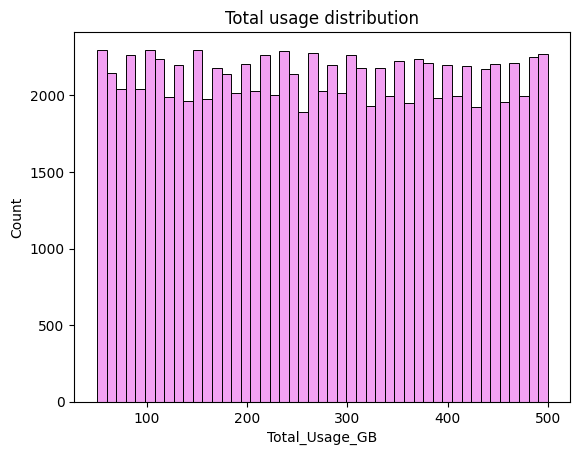

In [48]:
sns.histplot(df, x="Total_Usage_GB", color="violet").set(title="Total usage distribution")

All Numerical features are uniformly distributed.